In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("smsspam",sep="\t",names=["Status","Message"]) # Reads the files of sms span
df.loc[df["Status"]=="ham","Status"]=1 # Replaces the ham name to 1 in the status column
df.loc[df["Status"]=="spam","Status"]=0 # Replaces the spam name to 0 in the status column

In [3]:
df.head() # Changes done by the command in status column

,Status,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='Status', ylabel='count'>

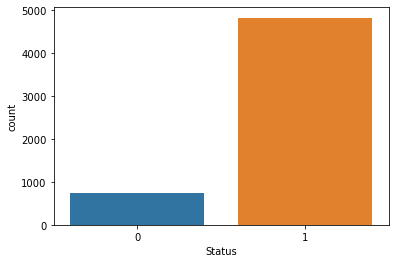

In [4]:
sns.countplot(x="Status",data=df) # Displays the number of spam and non spam messages in the dataset

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms 
# from datasets consisting of formats such as text and image.
# CountVectorizer = Convert a collection of text documents to a matrix of token counts.
# This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

In [6]:
cv=CountVectorizer() # Convert data to sparx matrix
# Most of the machine learning algorithms (read all), like logistic regression, understands only numbers.
# We need to figure out a way to convert a text sentence into numbers.
# Vectorization is a simple process of converting a text sentence into a array of numbers.

# Using count vectorizer, we tokenize the input text data, i.e we assign unique values to all the words in the message
# and count their occurrences. Using these values, we model the input text.

In [7]:
msg=cv.fit_transform(df["Message"])
# Learn the vocabulary dictionary and return term-document matrix.
# This is equivalent to fit followed by transform, but more efficiently implemented.

In [8]:
msg.shape # Tells the shape of the matrix that has been transferred from trxt to matrix by fit_transform

(5572, 8713)

In [9]:
x=msg
y=df.Status

In [10]:
y=y.astype('int')

In [11]:
from sklearn.model_selection import train_test_split
# Split arrays or matrices into random train and test subsets
# Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single
# call for splitting (and optionally subsampling) data in a oneliner.

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# Split arrays or matrices into random train and test subsets

In [13]:
# Bayes algo
from sklearn.naive_bayes import MultinomialNB
# Bayes Theorem finds the probability of an event occurring given the probability of another event that has already occurred.
# The multinomial Naive Bayes classifier is suitable for classification with discrete features
# (e.g., word counts for text classification). 

In [14]:
model = MultinomialNB()

In [15]:
model.fit(x_train,y_train)

MultinomialNB()

In [16]:
pred=model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,pred) # TP+TN/Total  fusiion matrix

0.979372197309417

In [19]:
m = cv.transform(["Hello how are you"])
model.predict(m)

array([1])

In [22]:
m = cv.transform(["You won free 10000$"])
model.predict(m)

array([0])